## Regression exercises

Linear regression is one of the most important modelling techniques. We looked into some of the important concepts like fitting a linear model, how variation os explained by the models, error of the estimates and little bit of multiple and multivariate regression. 

We will apply this knowledge gained in lab and practice notebooks on a new dataset about concrete. The dataset source says, concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. We will fit the model for the response variable concrete compressive strength and evaluate its relationship with other independent variables in the dataset.

Reading the data from dataset located at /datasets/concrete/Concrete_Data.csv

In [24]:
concrete_data = read.csv("../../../datasets/concrete/Concrete_Data.csv",header=TRUE)
head(concrete_data)

,Cement..component.1..kg.in.a.m.3.mixture.,Blast.Furnace.Slag..component.2..kg.in.a.m.3.mixture.,Fly.Ash..component.3..kg.in.a.m.3.mixture.,Water...component.4..kg.in.a.m.3.mixture.,Superplasticizer..component.5..kg.in.a.m.3.mixture.,Coarse.Aggregate...component.6..kg.in.a.m.3.mixture.,Fine.Aggregate..component.7..kg.in.a.m.3.mixture.,Age..day.,Concrete.compressive.strength.MPa..megapascals..
1,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28.00,79.99
2,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28.00,61.89
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270.00,40.27
4,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365.00,41.05
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.3
6,266.00,114.00,0.00,228.00,0.00,932.00,670.00,90.00,47.03


The column headers are not very aesthetic or readable. 

**Activity 1: **Modify the column names so that only the actual name of the columnn is used instead of all the unwanted description. Hint you can read the names of the columns from a separate file and extract the names.  

In [44]:
names=read.csv("../../../datasets/concrete/headers.txt",header = FALSE,sep="")
names=names[1]
names=as.vector(t(names))

[1] "character"

In [45]:
# ncol(concrete_data)
names(concrete_data)=names
head(concrete_data)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
1,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28.00,79.99
2,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28.00,61.89
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270.00,40.27
4,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365.00,41.05
5,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.3
6,266.00,114.00,0.00,228.00,0.00,932.00,670.00,90.00,47.03


In [46]:
nrow(concrete_data)

[1] 1030

In [47]:
summary(concrete_data)

     Cement          Blast            Fly             Water      
 Min.   :102.0   Min.   :  0.0   Min.   :  0.00   Min.   :121.8  
 1st Qu.:192.4   1st Qu.:  0.0   1st Qu.:  0.00   1st Qu.:164.9  
 Median :272.9   Median : 22.0   Median :  0.00   Median :185.0  
 Mean   :281.2   Mean   : 73.9   Mean   : 54.19   Mean   :181.6  
 3rd Qu.:350.0   3rd Qu.:142.9   3rd Qu.:118.30   3rd Qu.:192.0  
 Max.   :540.0   Max.   :359.4   Max.   :200.10   Max.   :247.0  
 Superplasticizer     Coarse            Fine            Age        
 Min.   : 0.000   Min.   : 801.0   Min.   :594.0   Min.   :  1.00  
 1st Qu.: 0.000   1st Qu.: 932.0   1st Qu.:731.0   1st Qu.:  7.00  
 Median : 6.400   Median : 968.0   Median :779.5   Median : 28.00  
 Mean   : 6.205   Mean   : 972.9   Mean   :773.6   Mean   : 45.66  
 3rd Qu.:10.200   3rd Qu.:1029.4   3rd Qu.:824.0   3rd Qu.: 56.00  
 Max.   :32.200   Max.   :1145.0   Max.   :992.6   Max.   :365.00  
    Concrete    
 Min.   : 2.33  
 1st Qu.:23.71  
 Median :34

The variables blast, Fly, Superplasticizer and Age appear to have skewed distributions. Lets check using skewness function in 'e1071' package.

In [65]:
# concrete_data[concrete_data$Blast==0,]
table(concrete_data$Blast)


    0    11  13.6    15  17.2  17.5  17.6    19    20    22    24    26    38 
  471     4     5     5     1     1     1    10    12     8    14     8     4 
 42.1  42.2  45.2  47.5    50  50.1  53.8  54.6  75.4    76    86  91.7    92 
    5     5     5     6     1     5     5     5     5     5     1     1     1 
 93.4  93.8  94.7    95    97  97.1  97.8  98.1  98.8    99   100 100.5 100.6 
    5     5     5     6     1     6     5    10     1     1     1     1     1 
  101   102   105 105.1 106.3 110.5   111   112 112.3   114 114.6   115   116 
    1     4     2     1    20     1     3     1     1     5     1     1     7 
116.8   117 117.2 117.6   118 118.8   119 119.7   120 120.5   121 122.6 124.1 
    1     1     5     1     1     5     1     1     1     1     3     4     2 
  128 128.5 128.9   129 129.8 129.9 132.4 132.6   133 133.7   134 135.7   136 
    1     5     1     1     5     5     6     1     5     1     1     2     1 
136.3   137 137.2   139 139.4 139.9   140 141.3 142

In [52]:
library(e1071)
skewness(concrete_data$Blast)
skewness(concrete_data$Fly)
skewness(concrete_data$Superplasticizer)
skewness(concrete_data$Age)

[1] 0.7983862

[1] 0.5357898

[1] 0.9045619

[1] 3.259662

All the four variables has large positive skews. You can plot the same and visually inspect the skewed nature of data. 

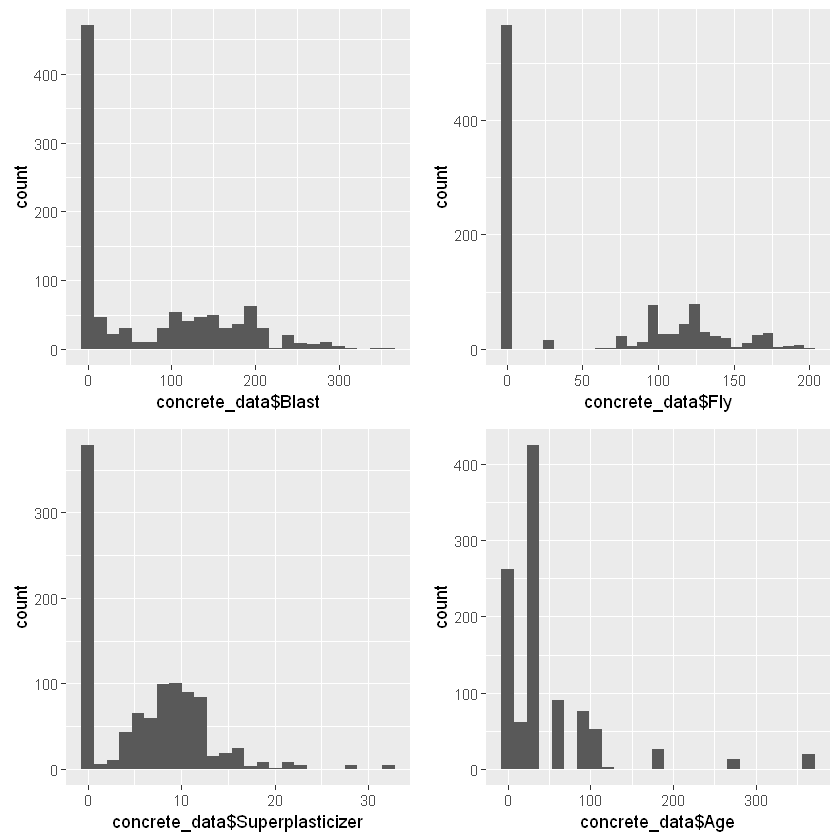

In [54]:
library(gridExtra)
library(ggplot2)
grid.arrange(
qplot(concrete_data$Blast,geom="histogram",bins=25),
qplot(concrete_data$Fly,geom="histogram",bins=30),
qplot(concrete_data$Superplasticizer,geom="histogram",bins=25),
qplot(concrete_data$Age,geom="histogram",bins=25),
nrow=2,ncol=2)

In [59]:
concrete_reg=lm(Concrete ~ ., data=concrete_data)
summary(concrete_reg)


Call:
lm(formula = Concrete ~ ., data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.654  -6.302   0.703   6.569  34.450 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -23.331214  26.585504  -0.878 0.380372    
Cement             0.119804   0.008489  14.113  < 2e-16 ***
Blast              0.103866   0.010136  10.247  < 2e-16 ***
Fly                0.087934   0.012583   6.988 5.02e-12 ***
Water             -0.149918   0.040177  -3.731 0.000201 ***
Superplasticizer   0.292225   0.093424   3.128 0.001810 ** 
Coarse             0.018086   0.009392   1.926 0.054425 .  
Fine               0.020190   0.010702   1.887 0.059491 .  
Age                0.114222   0.005427  21.046  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.4 on 1021 degrees of freedom
Multiple R-squared:  0.6155,	Adjusted R-squared:  0.6125 
F-statistic: 204.3 on 8 and 1021 DF,  p-value: < 2.2

In [67]:
concrete_reg1=lm(Concrete ~ . - Fly, data=concrete_data)
summary(concrete_reg1)


Call:
lm(formula = Concrete ~ . - Fly, data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.901  -7.239   0.441   6.899  34.408 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      121.611036  17.015934   7.147 1.69e-12 ***
Cement             0.067636   0.004135  16.357  < 2e-16 ***
Blast              0.042550   0.005192   8.196 7.39e-16 ***
Water             -0.323265   0.032336  -9.997  < 2e-16 ***
Superplasticizer   0.371641   0.094876   3.917 9.56e-05 ***
Coarse            -0.027502   0.006913  -3.978 7.44e-05 ***
Fine              -0.038549   0.006777  -5.688 1.68e-08 ***
Age                0.109746   0.005514  19.903  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.64 on 1022 degrees of freedom
Multiple R-squared:  0.5971,	Adjusted R-squared:  0.5944 
F-statistic: 216.4 on 7 and 1022 DF,  p-value: < 2.2e-16
